### Imports

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

try:
  from google.colab import drive
  drive.mount('/content/drive')

  COLAB = True
except ModuleNotFoundError:
  COLAB = False

# Data Gathering

TODO:

- [x] Create the sections (Bruno)
- [x] Create a structure to download from drive and create the pandas dataframe (Bruno)
- [x] Create a structure to load data in colab or locally in the same way, saving in a variable called `df` (Bruno)


Download [here](https://drive.google.com/file/d/1hWST2LvCc4ai15ZtUMoC9vj0cDDf3izS/view?usp=drive_link) the CSV. Upload it to your own google-drive inside a folder called `predictive-analysis`

In [2]:
if COLAB:
  df = pd.read_csv('/content/drive/MyDrive/predictive-analysis/essays.csv')
else:
  df = pd.read_csv("essays.csv")

df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


# Data Cleaning

TODO:

- [x] Check the shape and the types of each column (Bruno)
- [x] Check the names of the categories in `discourse_text` and `discourse_effectiveness`, validate if they match with kaggle's specification. (Bruno)
- [ ] Check for outliers, especially in the column `discourse_text`

In [3]:
df.shape

(36765, 5)

In [4]:
df.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36765,36765,36765,36765,36765
unique,36765,4191,36691,7,3
top,c8a973681feb,900A879708F0,Summer projects should be student-designed,Evidence,Adequate
freq,1,23,14,12105,20977


In [5]:
# it appears as an object because everything is a string. It is all good!
df.dtypes

discourse_id               object
essay_id                   object
discourse_text             object
discourse_type             object
discourse_effectiveness    object
dtype: object

In [6]:
df.discourse_type.unique()

array(['Lead', 'Position', 'Claim', 'Evidence', 'Counterclaim',
       'Rebuttal', 'Concluding Statement'], dtype=object)

In [7]:
df.discourse_effectiveness.unique()

array(['Adequate', 'Ineffective', 'Effective'], dtype=object)

In [6]:
df['number_of_char']=df['discourse_text'].apply(len)

In [7]:
df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,number_of_char
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,317
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,210
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,105
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,362
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,101


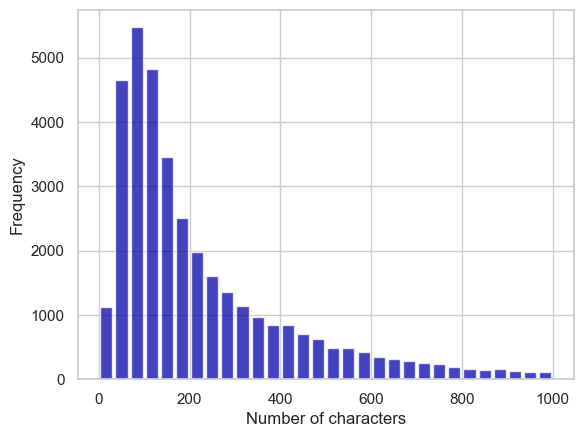

In [53]:
plt.hist(df['number_of_char'], bins=30, color='#0504aa',alpha=0.75, rwidth=0.8,range=[0,1000])  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Number of characters');

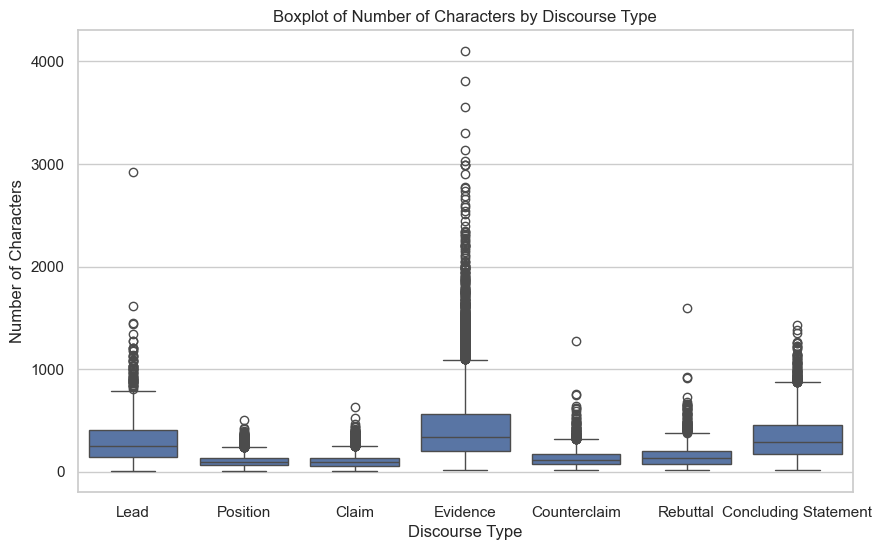

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a boxplot with outliers
sns.boxplot(x='discourse_type', y='number_of_char', data=df)

# Set plot labels and title
plt.xlabel('Discourse Type')
plt.ylabel('Number of Characters')
plt.title('Boxplot of Number of Characters by Discourse Type')

# Show the plot
plt.show()

Now We will compute the number of words for each word. Keep in mind that here we will use space(basic) tokenization using split() function. There are other possible ways that we can use later.

In [38]:
df['number_of_words']=df['discourse_text'].apply(lambda x: len(x.split()))

In [39]:
df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,number_of_char,number_of_words
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,317,67
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,210,41
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,105,21
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,362,72
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,101,18


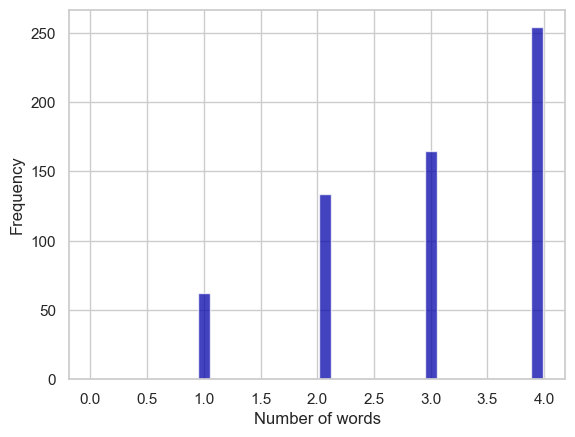

In [55]:
plt.hist(df['number_of_words'], bins=30, color='#0504aa',alpha=0.75, rwidth=0.8,range=[0,4])  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Number of words');

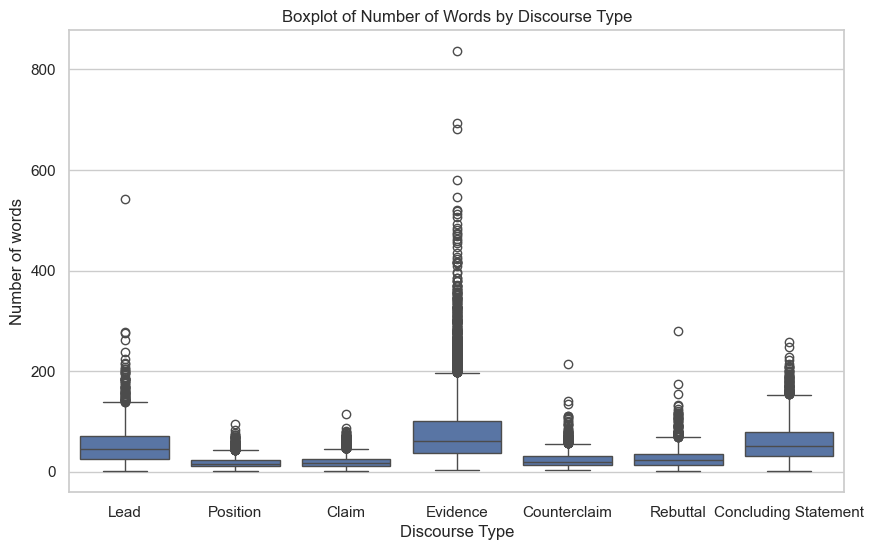

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a boxplot with outliers
sns.boxplot(x='discourse_type', y='number_of_words', data=df)

# Set plot labels and title
plt.xlabel('Discourse Type')
plt.ylabel('Number of words')
plt.title('Boxplot of Number of Words by Discourse Type')

# Show the plot
plt.show()

# EDA

TODO:

- [x] show the distribution of each category in an ugly and lazy way (Bruno)
- [ ] replace the ugly and lazy presentation for nice and awesome graphs
- [ ] bring ideas to what kind of EDA we can do in the text column (`discourse_text`)


In [8]:
df[["discourse_type"]].value_counts()

discourse_type      
Evidence                12105
Claim                   11977
Position                 4024
Concluding Statement     3351
Lead                     2291
Counterclaim             1773
Rebuttal                 1244
Name: count, dtype: int64

In [9]:
df[["discourse_effectiveness"]].value_counts()

discourse_effectiveness
Adequate                   20977
Effective                   9326
Ineffective                 6462
Name: count, dtype: int64

In [10]:
df[["discourse_type", "discourse_effectiveness"]].value_counts().sort_index()

discourse_type        discourse_effectiveness
Claim                 Adequate                   7097
                      Effective                  3405
                      Ineffective                1475
Concluding Statement  Adequate                   1945
                      Effective                   825
                      Ineffective                 581
Counterclaim          Adequate                   1150
                      Effective                   418
                      Ineffective                 205
Evidence              Adequate                   6064
                      Effective                  2885
                      Ineffective                3156
Lead                  Adequate                   1244
                      Effective                   683
                      Ineffective                 364
Position              Adequate                   2784
                      Effective                   770
                      Ineffective   